Displaying images from folder: Job_28


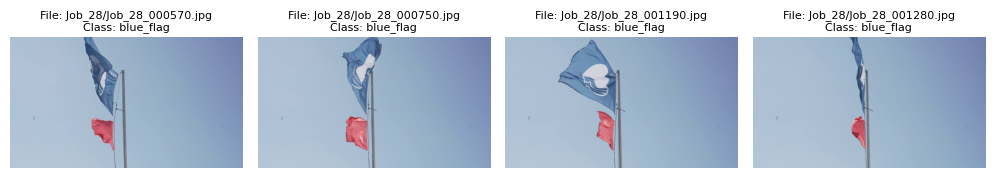

Displaying images from folder: Job_31


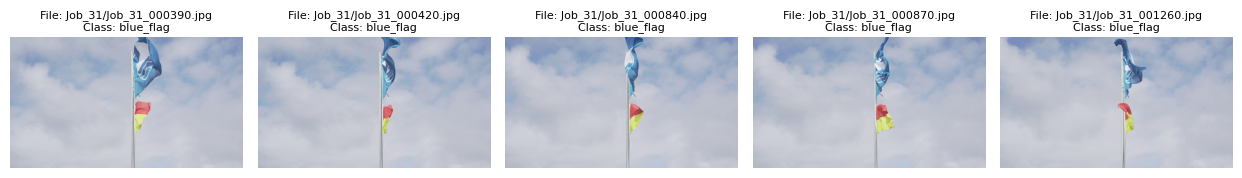

Displaying images from folder: Job_69


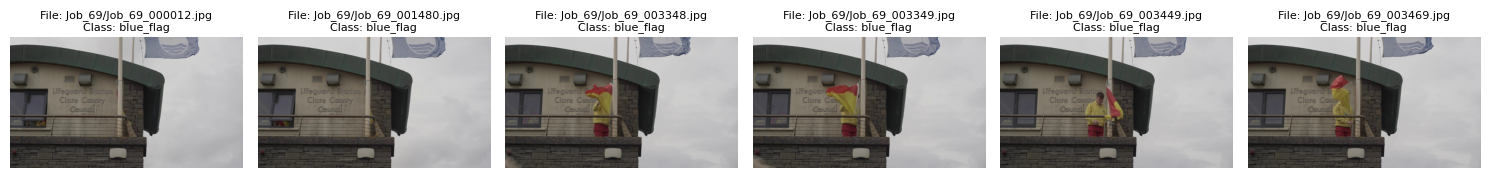

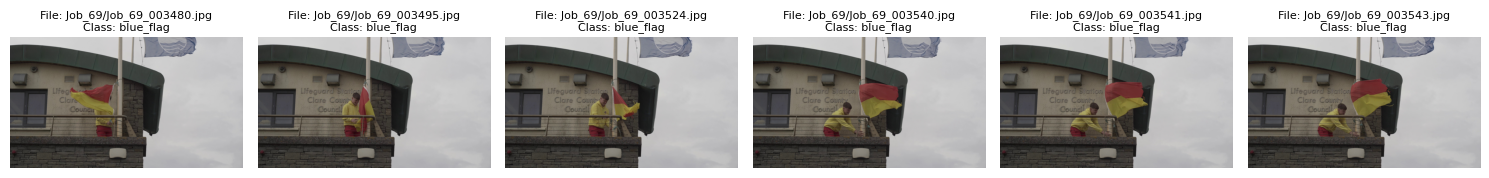

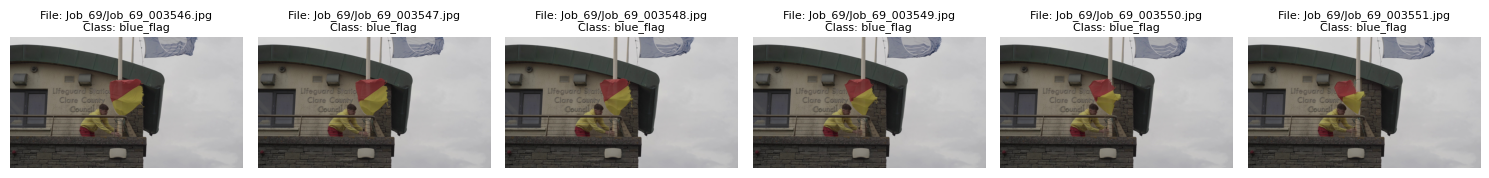

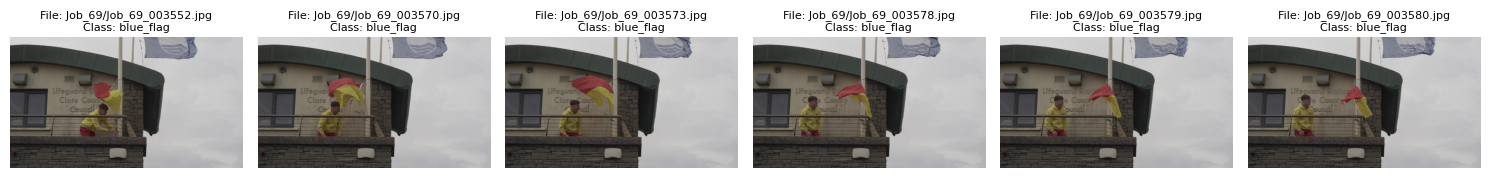

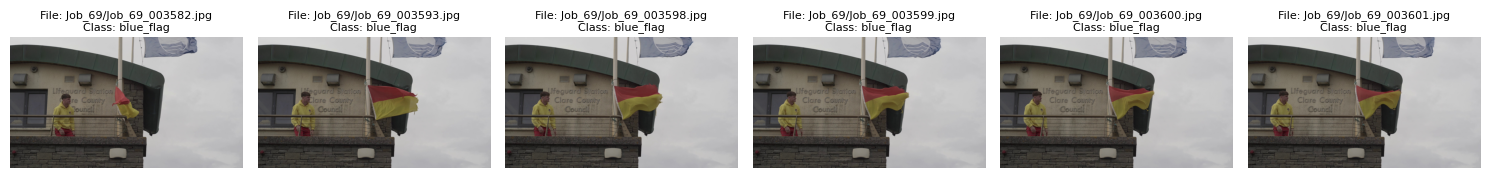

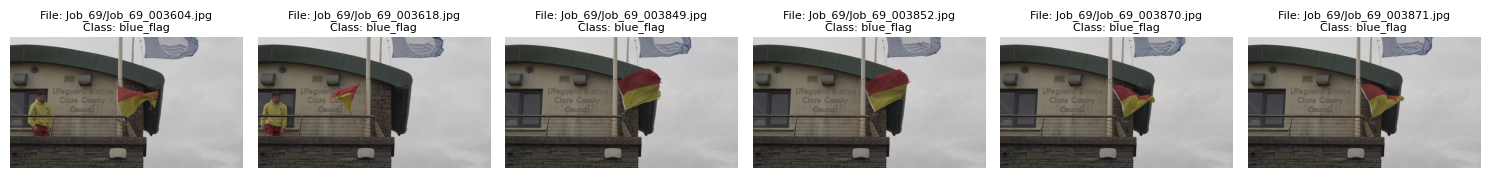

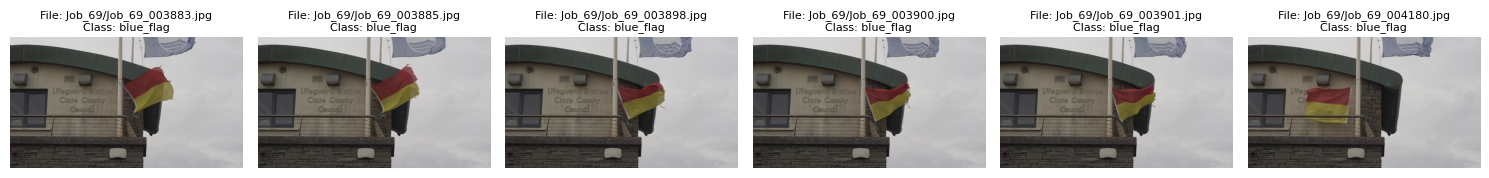

Displaying images from folder: Job_98


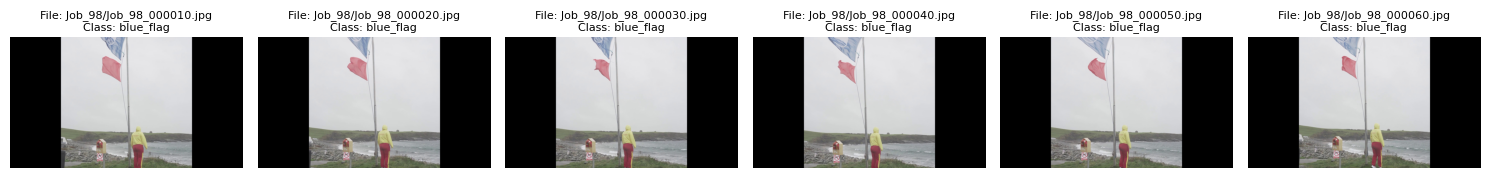

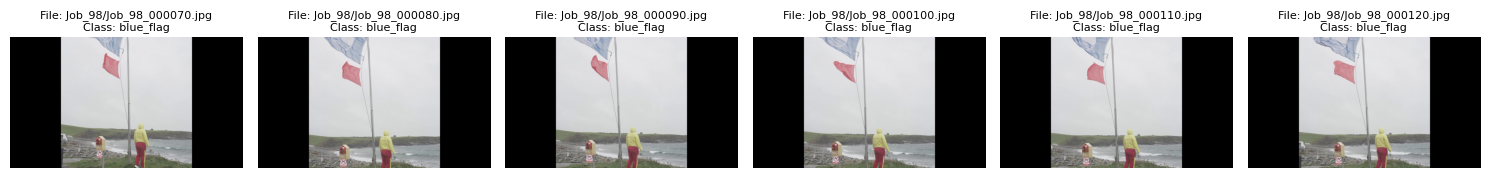

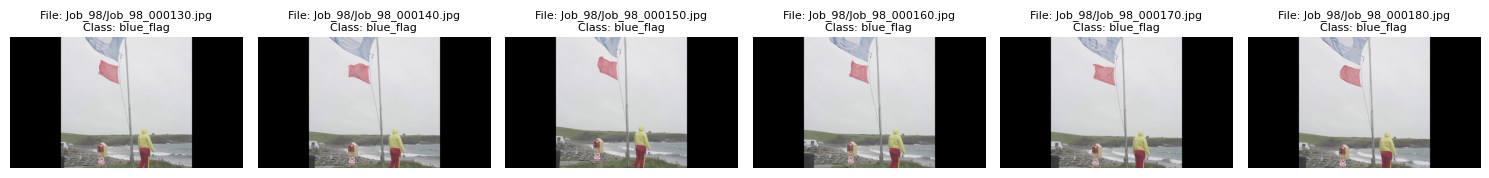

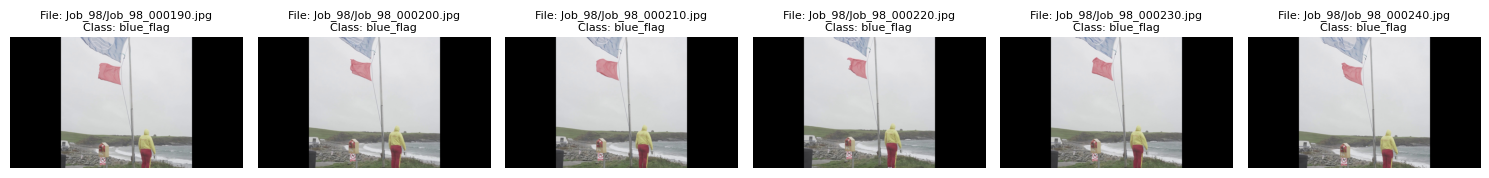

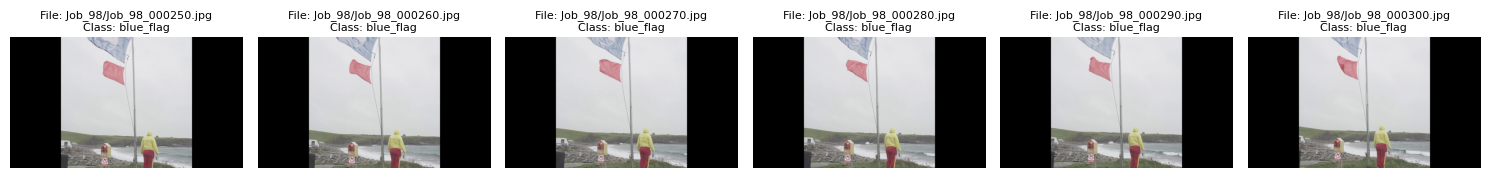

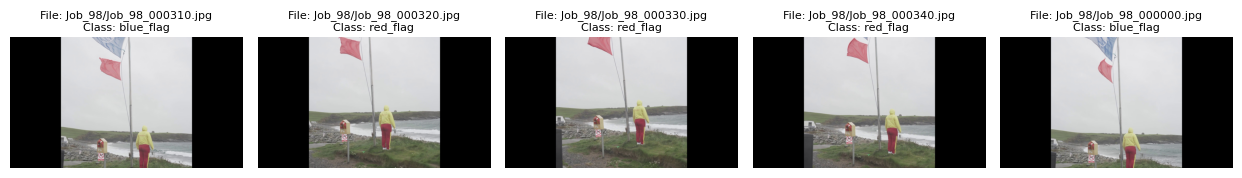

Displaying images from folder: Job_155


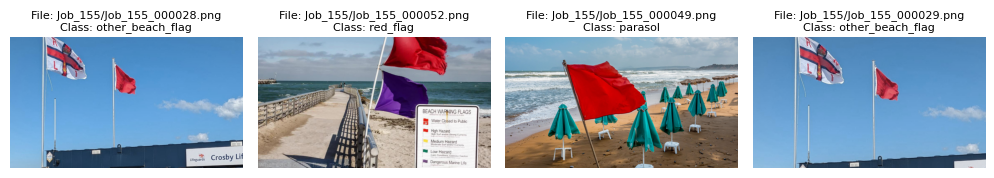

Displaying images from folder: Job_156


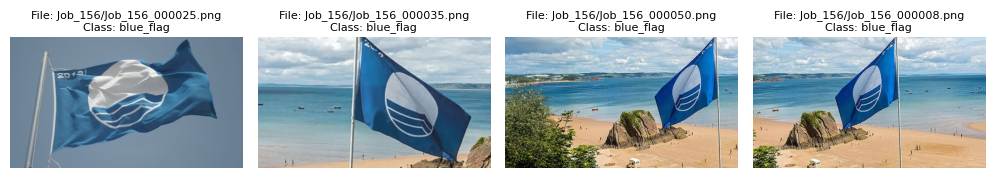

Displaying images from folder: Job_157


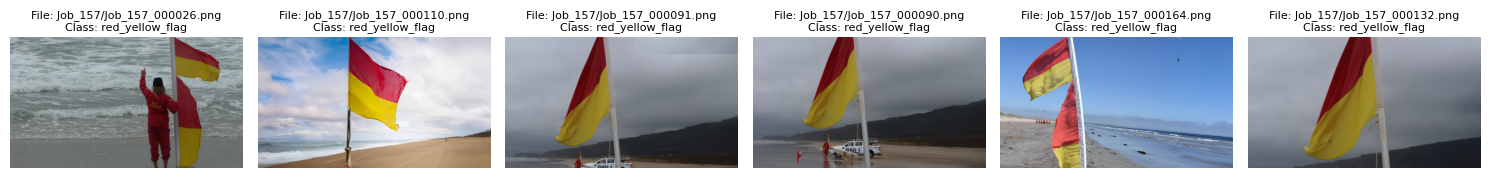

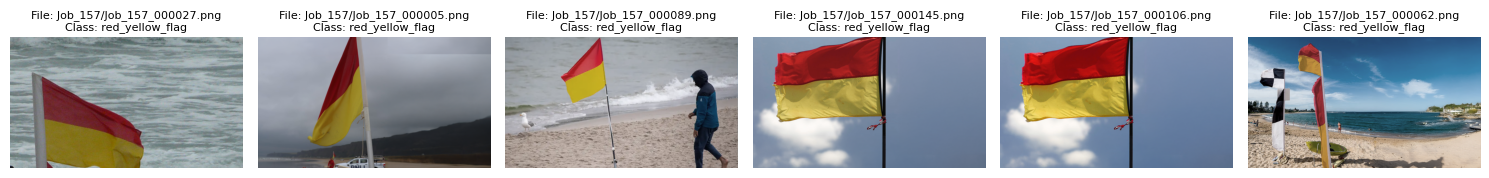

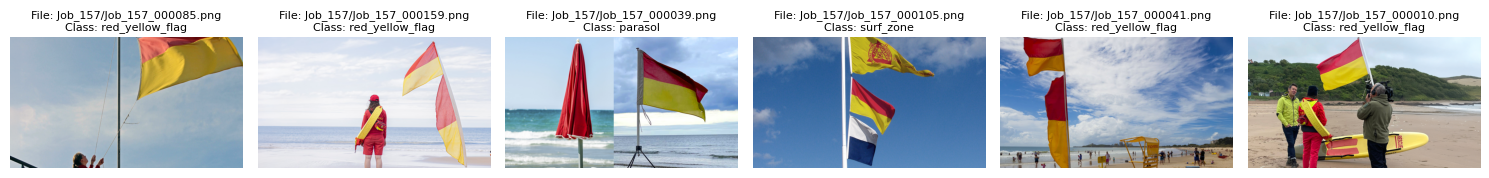

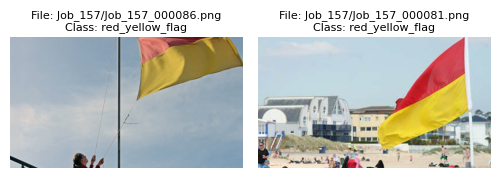

Displaying images from folder: Job_158


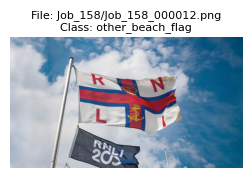

Displaying images from folder: Job_159


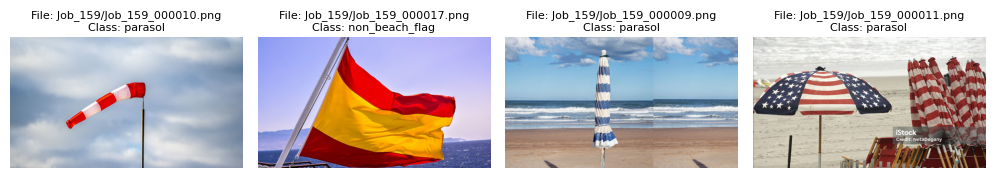

Displaying images from folder: Job_160


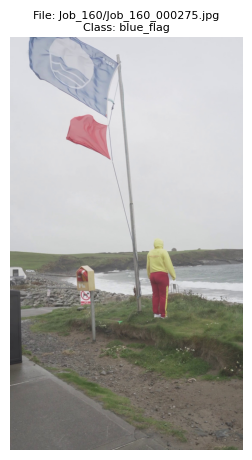

Displaying images from folder: Job_21_Aug


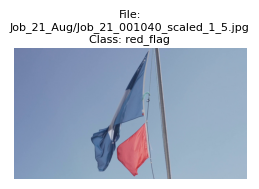

Displaying images from folder: Job_31_Aug


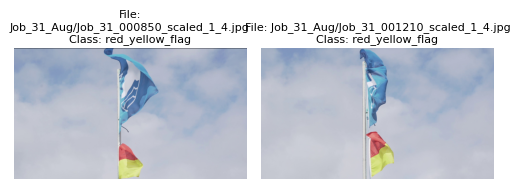

Displaying images from folder: Job_32_Aug


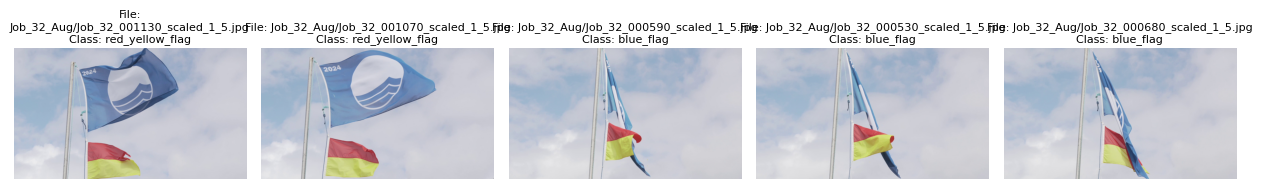

Displaying images from folder: Job_105_Aug


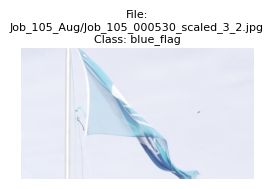

Displaying images from folder: Job_143_Aug


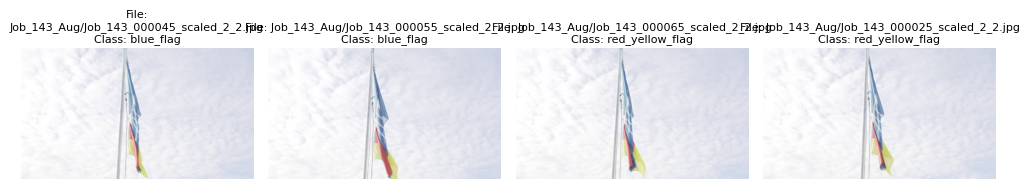

Displaying images from folder: Job_29_Aug


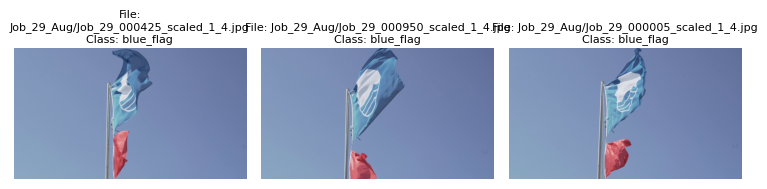

Displaying images from folder: Job_7_Aug_ILLUM


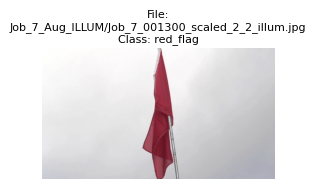

Displaying images from folder: Job_146


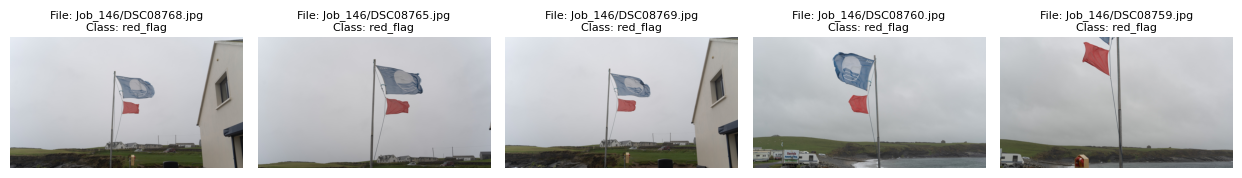

Displaying images from folder: Job_145_Aug


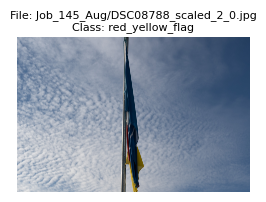

Displaying images from folder: Job_145


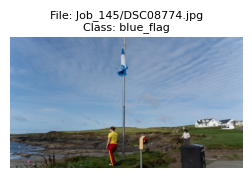

Displaying images from folder: Job_7_Aug


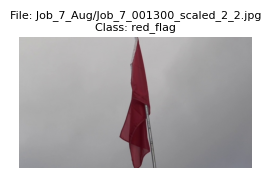

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

def load_obj_names(obj_names_path):
    """
    Load the obj.names file to map class IDs to class names.

    Args:
        obj_names_path (str): Path to the obj.names file.

    Returns:
        dict: A dictionary mapping class IDs to class names.
    """
    class_names = {}
    with open(obj_names_path, 'r') as file:
        for i, line in enumerate(file.readlines()):
            class_names[i] = line.strip()
    return class_names

def find_annotations_near_edges_excluding_class(parent_folder, image_height, threshold, excluded_class):
    """
    Find images with annotations near the edges of the image, excluding a specific class.

    Args:
        parent_folder (str): Path to the parent folder containing the images and annotations.
        image_height (int): Height of the image in pixels.
        threshold (int): Distance from the edge to consider as "near".
        excluded_class (int): Class ID to exclude from consideration.

    Returns:
        dict: A dictionary with folder names as keys and lists of affected image names and class IDs as values.
    """
    affected_images = {}

    for folder in os.listdir(parent_folder):
        folder_path = os.path.join(parent_folder, folder)
        if not os.path.isdir(folder_path):
            continue

        for file_name in os.listdir(folder_path):
            if file_name.endswith('.txt'):
                annotation_path = os.path.join(folder_path, file_name)
                with open(annotation_path, 'r') as file:
                    for line in file:
                        parts = line.strip().split()
                        class_id = int(parts[0])
                        if class_id == excluded_class:
                            continue

                        _, y_center, _, height = map(float, parts[1:])
                        top_edge_distance = y_center * image_height - (height * image_height / 2)
                        bottom_edge_distance = image_height - (y_center * image_height + (height * image_height / 2))

                        if top_edge_distance < threshold or bottom_edge_distance < threshold:
                            if folder not in affected_images:
                                affected_images[folder] = []
                            
                            # Check for both .jpg and .png file formats
                            image_stem = file_name.replace('.txt', '')
                            if os.path.exists(os.path.join(folder_path, image_stem + '.jpg')):
                                image_file = image_stem + '.jpg'
                            elif os.path.exists(os.path.join(folder_path, image_stem + '.png')):
                                image_file = image_stem + '.png'
                            else:
                                print(f"Warning: No corresponding image found for {file_name}")
                                continue

                            affected_images[folder].append((image_file, class_id))
                            break  # Only record once per image

    return affected_images
    
def display_affected_images_with_filenames(affected_images, parent_folder, obj_names_path, max_images=6):
    """
    Display affected images in a grid, with filenames and class names displayed below each image.

    Args:
        affected_images (dict): Dictionary with folder names as keys and lists of affected image names as values.
        parent_folder (str): Path to the parent folder containing the images.
        obj_names_path (str): Path to the obj.names file for class name mapping.
        max_images (int): Maximum number of images to display per grid row.
    """
    class_names = load_obj_names(obj_names_path)

    for folder, images in affected_images.items():
        print(f"Displaying images from folder: {folder}")
        folder_path = os.path.join(parent_folder, folder)

        # Batch process images in groups of max_images
        for i in range(0, len(images), max_images):
            plt.figure(figsize=(15, 10))
            batch = images[i:i + max_images]

            for j, (image_name, class_id) in enumerate(batch):
                image_path = os.path.join(folder_path, image_name)
                img = cv2.imread(image_path)
                if img is not None:
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                else:
                    # Provide detailed information about the error
                    if not os.path.exists(image_path):
                        print(f"Error: Image not found - {image_path}")
                    else:
                        print(f"Error: Could not open image file - {image_path}.")
                        print("Possible causes:")
                        print("- File is corrupted.")
                        print("- File is not a valid image format.")
                        print("- File permissions prevent reading.")
                    continue

                plt.subplot(1, max_images, j + 1)
                plt.imshow(img_rgb)
                plt.axis('off')

                # Display filename and class name
                title = f"File: {folder}/{image_name}\nClass: {class_names.get(class_id, 'Unknown')}"
                plt.title(title, fontsize=8, wrap=True)

            plt.tight_layout()
            plt.show()


parent_folder = "D:/FlagDetectionDatasets/ExportedDatasetsSelected"
obj_names_path = "D:/FlagDetectionDatasets/ExportedDatasetsReduced/obj.names"
image_height = 1080
threshold = 7
excluded_class = 4
# Find affected image
affected_images = find_annotations_near_edges_excluding_class(parent_folder, image_height, threshold, excluded_class)
# Display affected images with filenames and class names
display_affected_images_with_filenames(affected_images, parent_folder, obj_names_path, max_images=6)
